In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
df = pd.read_excel("Series_2.xlsx")

In [3]:
df.head()

,Time,Value
0,1,50
1,2,120
2,3,-25
3,4,31
4,5,94


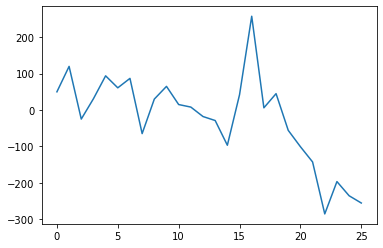

In [4]:
plt.plot(df["Value"])

In [5]:
df["Value"].values

array([  50,  120,  -25,   31,   94,   61,   87,  -65,   30,   65,   15,
          8,  -18,  -29,  -97,   42,  258,    6,   45,  -56, -101, -143,
       -286, -197, -236, -256], dtype=int64)

In [6]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.743415
p-value: 0.408894
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Failed to Reject Ho - Time Series is Non-Stationary


<AxesSubplot:>

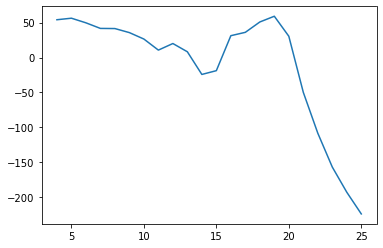

In [7]:
df.Value.rolling(window=5).mean().plot()

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

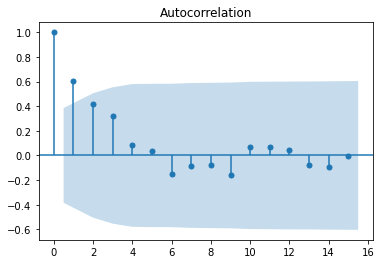

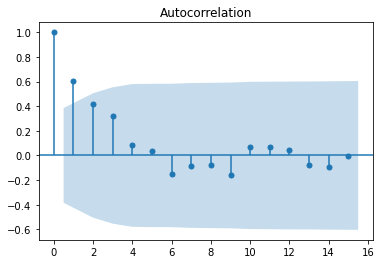

In [9]:
plot_acf(df.Value)

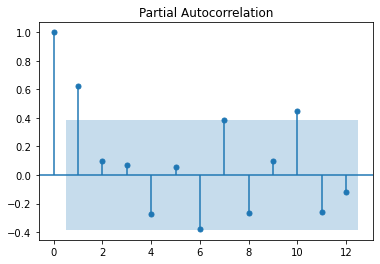

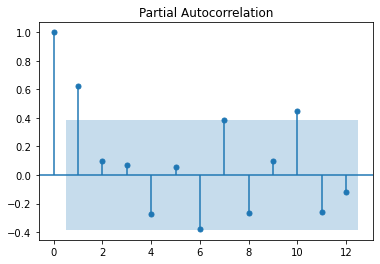

In [10]:
plot_pacf(df.Value,lags=12)

In [11]:
df['Valud'] = df['Value'] - df['Value'].shift(1)

In [12]:
df.head()

,Time,Value,Valud
0,1,50,NaN
1,2,120,70.0
2,3,-25,-145.0
3,4,31,56.0
4,5,94,63.0


<AxesSubplot:>

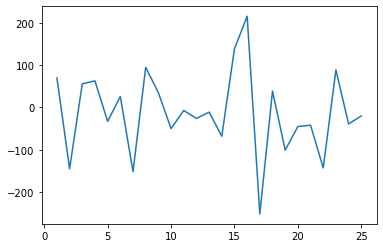

In [13]:
df.Valud.plot()

In [14]:
df['Vallog'] = np.log(df.Value)

df['Valsqrt'] = np.sqrt(df.Value)

df['Valcbrt'] = np.cbrt(df.Value)
df

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Time,Value,Valud,Vallog,Valsqrt,Valcbrt
0,1,50,NaN,3.912023,7.071068,3.684031
1,2,120,70.0,4.787492,10.954451,4.932424
2,3,-25,-145.0,NaN,NaN,-2.924018
3,4,31,56.0,3.433987,5.567764,3.141381
4,5,94,63.0,4.543295,9.695360,4.546836
5,6,61,-33.0,4.110874,7.810250,3.936497
6,7,87,26.0,4.465908,9.327379,4.431048
7,8,-65,-152.0,NaN,NaN,-4.020726
8,9,30,95.0,3.401197,5.477226,3.107233
9,10,65,35.0,4.174387,8.062258,4.020726


<AxesSubplot:>

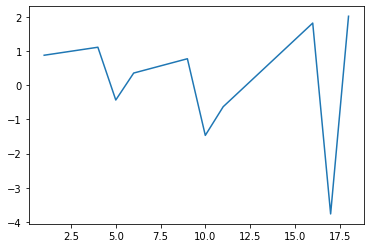

In [15]:
df['Vallogdiff'] = df['Vallog'] - df['Vallog'].shift(1)
df['Vallogdiff'].dropna().plot()

In [16]:
df['MA'] = df['Value'].rolling(window = 30).mean()

In [17]:
df['MA']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
Name: MA, dtype: float64

<AxesSubplot:>

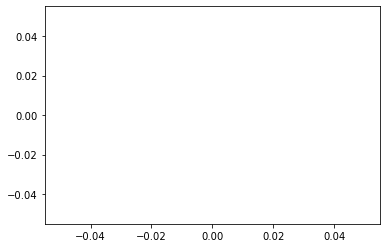

In [18]:
df.MA.plot()

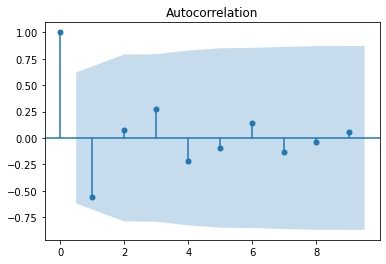

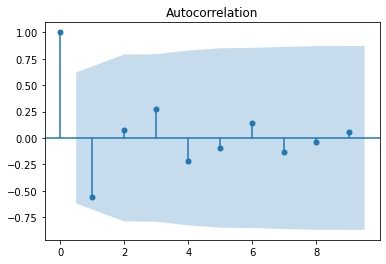

In [19]:
plot_acf(df.Vallogdiff.dropna())

In [20]:
df["Diff_Value"] = df["Value"].diff()

In [21]:
diff_values = df["Diff_Value"].values
Y = diff_values[~np.isnan(diff_values)]

In [22]:
ts_values_orig = df["Value"].values
ts_values = ts_values_orig[:-1]

In [23]:
X = sm.add_constant(ts_values)

In [24]:
model = sm.OLS(Y,X)
results = model.fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.039
Date:                Sun, 04 Apr 2021   Prob (F-statistic):             0.0946
Time:                        10:33:36   Log-Likelihood:                -148.93
No. Observations:                  25   AIC:                             301.9
Df Residuals:                      23   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2489     19.640     -0.827      0.4

In [26]:
results.tvalues[1]

-1.7434145361492948